## Online Grocery Recommendation System
## Team Members :
[ Zeina Ayman 202200351 - Habiba Khalil 202200720 - Nour Helmy 202202012 - Youssef Abohendia 202202699 - Youssef Fathy 202202193 ]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [11]:
order_products__prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [12]:
order_products__train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [16]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

In [17]:
order_products__prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [18]:
order_products__train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [19]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [20]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [21]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(orders['days_since_prior_order'].median())

In [22]:
orders.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [23]:
aisles.duplicated().sum()

0

In [24]:
departments.duplicated().sum()

0

In [25]:
order_products__prior.duplicated().sum()

0

In [26]:
order_products__train.duplicated().sum()

0

In [27]:
orders.duplicated().sum()

0

In [28]:
products.duplicated().sum()

0

In [29]:
merged = order_products__prior.merge(products,on = 'product_id')
merged = merged.merge(aisles,on = 'aisle_id')
merged = merged.merge(departments,on = 'department_id')
merged = merged.merge(orders,on = 'order_id')
merged2 = order_products__train.merge(products,on = 'product_id')
merged2 = merged2.merge(aisles,on = 'aisle_id')
merged2 = merged2.merge(departments,on = 'department_id')
merged2 = merged2.merge(orders,on = 'order_id')
merged = pd.concat([merged,merged2],ignore_index = True)

In [30]:
merged.isna().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [31]:
merged.duplicated().sum()

0

In [32]:
merged['user_total_orders'] = merged.groupby('user_id')['order_number'].transform('max')
merged['user_total_products'] = merged.groupby('user_id')['product_id'].transform('count')
merged['user_reorder_ratio'] = merged.groupby('user_id')['reordered'].transform('mean')
merged['product_total_orders'] = merged.groupby('product_id')['order_id'].transform('count')
merged['product_reorder_ratio'] = merged.groupby('product_id')['reordered'].transform('mean')

In [33]:
X = merged[['user_total_orders','user_total_products','user_reorder_ratio','product_total_orders','product_reorder_ratio','add_to_cart_order','order_dow','order_hour_of_day','days_since_prior_order']]
Y = merged['reordered']

In [34]:
merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders,user_total_products,user_reorder_ratio,product_total_orders,product_reorder_ratio
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,9,100,0.5,20234,0.710240
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,9,100,0.5,70076,0.696173
2,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,9,100,0.5,75233,0.640876
3,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0,9,100,0.5,158,0.246835
4,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,9,100,0.5,6569,0.158624


In [35]:
categorical_features = ['aisle','department','product_name']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    merged[feature] = le.fit_transform(merged[feature])
    label_encoders[feature] = le

In [36]:
merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders,user_total_products,user_reorder_ratio,product_total_orders,product_reorder_ratio
0,2,33120,1,1,29760,86,16,41,7,202279,prior,3,5,9,8.0,9,100,0.5,20234,0.710240
1,2,28985,2,1,25233,83,4,53,19,202279,prior,3,5,9,8.0,9,100,0.5,70076,0.696173
2,2,17794,6,1,6800,83,4,53,19,202279,prior,3,5,9,8.0,9,100,0.5,75233,0.640876
3,2,43668,9,0,9184,123,4,98,19,202279,prior,3,5,9,8.0,9,100,0.5,158,0.246835
4,2,9327,3,0,16739,104,13,122,16,202279,prior,3,5,9,8.0,9,100,0.5,6569,0.158624


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
Y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
accuracy_knn = accuracy_score(Y_test,Y_pred_knn)
precision_knn = precision_score(Y_test,Y_pred_knn)
recall_knn = recall_score(Y_test,Y_pred_knn)
roc_auc_knn = roc_auc_score(Y_test,Y_pred_proba_knn)
print('KNN Model:')
print(f'Accuracy: {accuracy_knn:.2f}')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'AUC-ROC: {roc_auc_knn:.2f}')

KNN Model:
Accuracy: 0.66
Precision: 0.70
Recall: 0.76
AUC-ROC: 0.69


In [39]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
Y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
accuracy_dt = accuracy_score(Y_test,Y_pred_dt)
precision_dt = precision_score(Y_test,Y_pred_dt)
recall_dt = recall_score(Y_test,Y_pred_dt)
roc_auc_dt = roc_auc_score(Y_test,Y_pred_proba_dt)
print('Decision Tree Model:')
print(f'Accuracy: {accuracy_dt:.2f}')
print(f'Precision: {precision_dt:.2f}')
print(f'Recall: {recall_dt:.2f}')
print(f'AUC-ROC: {roc_auc_dt:.2f}')

Decision Tree Model:
Accuracy: 0.66
Precision: 0.71
Recall: 0.71
AUC-ROC: 0.65


In [40]:
lr = LogisticRegression(random_state = 42,max_iter = 1000)
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
Y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
accuracy_lr = accuracy_score(Y_test,Y_pred_lr)
precision_lr = precision_score(Y_test,Y_pred_lr)
recall_lr = recall_score(Y_test,Y_pred_lr)
roc_auc_lr = roc_auc_score(Y_test,Y_pred_proba_lr)
print('Logistic Regression Model:')
print(f'Accuracy: {accuracy_lr:.2f}')
print(f'Precision: {precision_lr:.2f}')
print(f'Recall: {recall_lr:.2f}')
print(f'AUC-ROC: {roc_auc_lr:.2f}')

Logistic Regression Model:
Accuracy: 0.66
Precision: 0.70
Recall: 0.75
AUC-ROC: 0.70


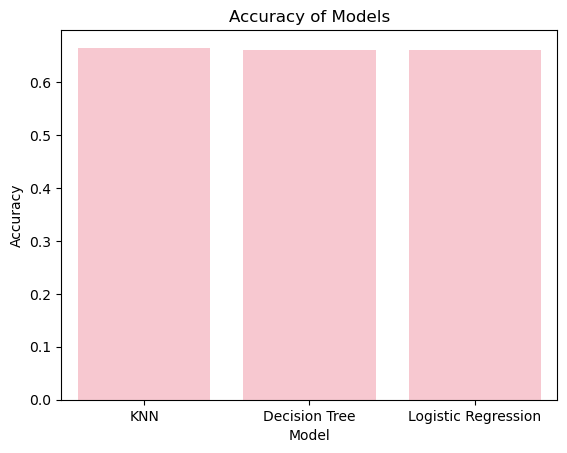

In [41]:
accuracy_scores = [accuracy_knn,accuracy_dt,accuracy_lr]
models = ['KNN','Decision Tree','Logistic Regression']
sns.barplot(x = models,y = accuracy_scores,color = 'pink')
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

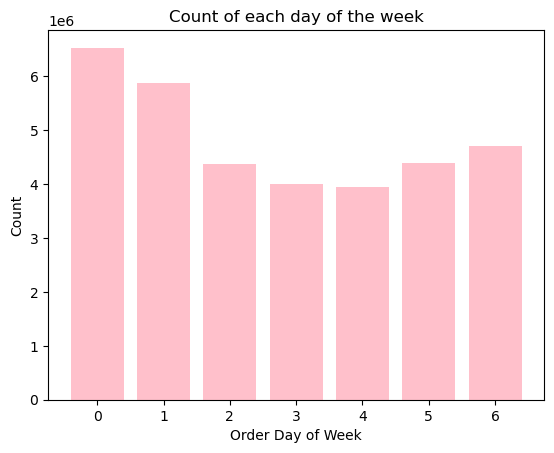

In [42]:
x = merged['order_dow'].value_counts().index
y = merged['order_dow'].value_counts()
plt.bar(x,y,color = 'pink')
plt.title('Count of each day of the week')
plt.xlabel('Order Day of Week')
plt.ylabel('Count')
plt.show()

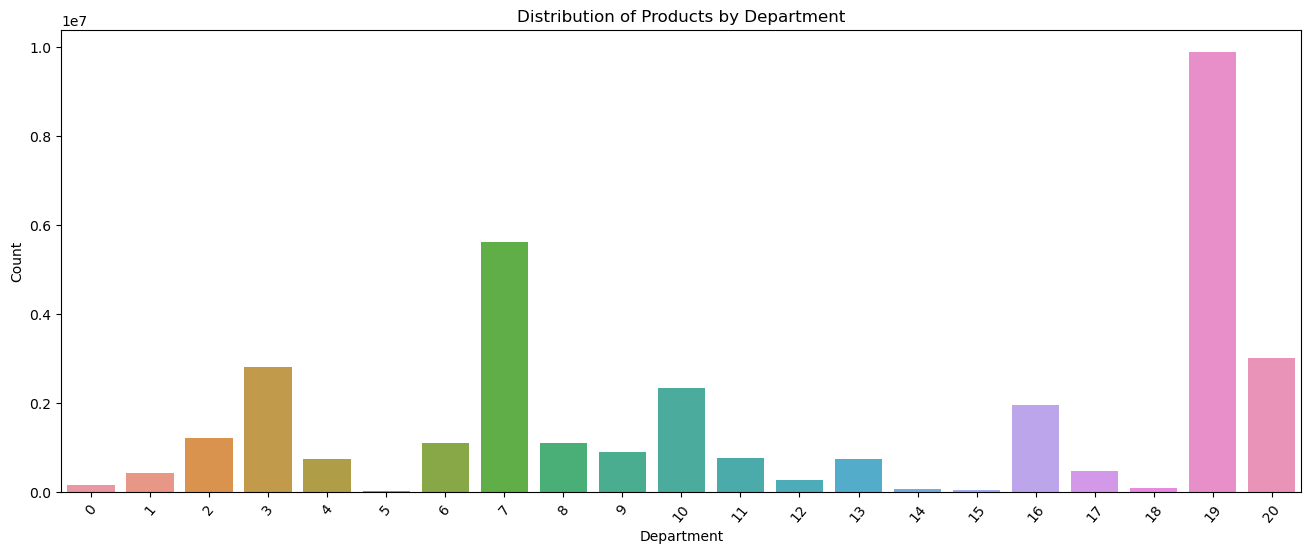

In [43]:
plt.figure(figsize = (16,6))
sns.countplot(x = 'department',data = merged)
plt.title('Distribution of Products by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

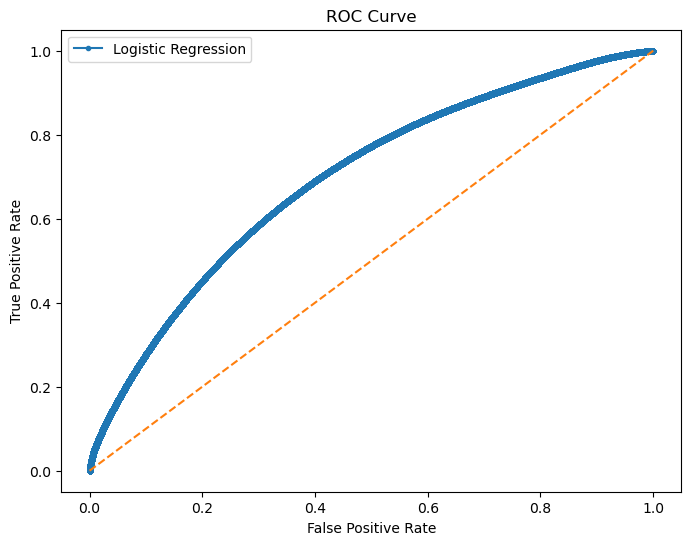

In [44]:
fpr, tpr, _ = roc_curve(Y_test,Y_pred_proba_lr)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,marker = '.',label = 'Logistic Regression')
plt.plot([0,1],[0,1],linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

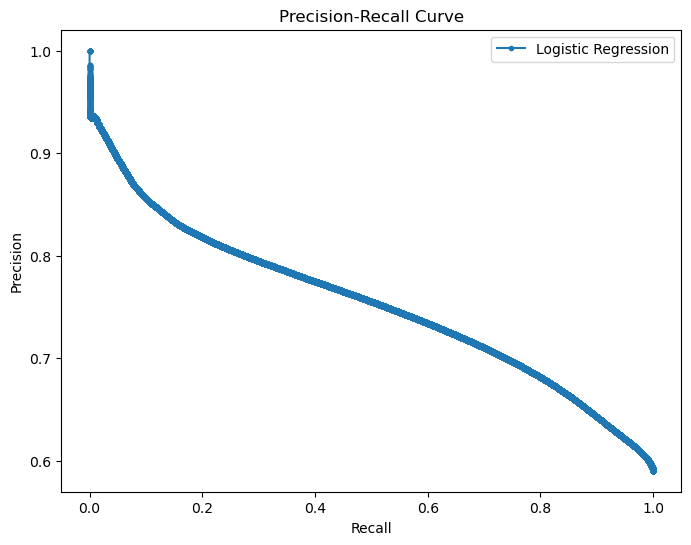

In [47]:
precision_lr, recall_lr, _ = precision_recall_curve(Y_test,Y_pred_proba_lr)
plt.figure(figsize = (8,6))
plt.plot(recall_lr,precision_lr,marker = '.',label = 'Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()